In [ ]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 60.2 MB/s eta 0:00:00


MSA ile BENZERLİK BULMA

In [ ]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
alignment = MultipleSeqAlignment(
     [
        SeqRecord(Seq("ACCTGCACCA"), id='seq1'),
        SeqRecord(Seq("AGCTCCACTA"), id='seq2'),
        SeqRecord(Seq("GCCTACACTA"), id='seq3'),
        SeqRecord(Seq("TCCTACATCA"), id='seq4'),
        SeqRecord(Seq("CCCTGAACCT"), id='seq5'),
        SeqRecord(Seq("TCCTACACTA"), id='seq6'),
    ]
 )

print(alignment)

Alignment with 6 rows and 10 columns
ACCTGCACCA seq1
AGCTCCACTA seq2
GCCTACACTA seq3
TCCTACATCA seq4
CCCTGAACCT seq5
TCCTACACTA seq6


DİSTANCE MATRİX

In [ ]:
# Importing necessary libraries from BioPython
from Bio import Phylo, AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

In [ ]:
# Calculate the distance matrix
calculator = DistanceCalculator('identity')
distMatrix = calculator.get_distance(alignment)
print(distMatrix)

seq1	0
seq2	0.30000000000000004	0
seq3	0.30000000000000004	0.30000000000000004	0
seq4	0.30000000000000004	0.5	0.30000000000000004	0
seq5	0.30000000000000004	0.6	0.5	0.5	0
seq6	0.30000000000000004	0.30000000000000004	0.09999999999999998	0.19999999999999996	0.5	0
	seq1	seq2	seq3	seq4	seq5	seq6


COMPLETE GRAPH

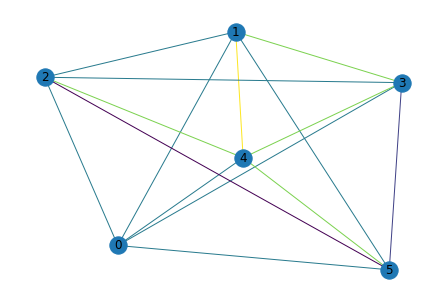

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx


A = np.array([(0, 0.3, 0.3, 0.3, 0.3, 0.3),
              (0.3, 0, 0.3, 0.5, 0.6, 0.3),
              (0.3, 0.3, 0, 0.3, 0.5, 0.09 ),
              (0.3, 0.5, 0.3, 0, 0.5, 0.19),
              (0.3, 0.6, 0.5, 0.5, 0, 0.5),
              (0.3, 0.3, 0.09, 0.19, 0.5, 0)
              ])*100

G=nx.from_numpy_matrix(A)

nx.draw(G,edge_color = [ i[2]['weight'] for i in G.edges(data=True)], with_labels=True  )

plot = plt.figure()

plt.show()


KÜTÜPHANEDEN MST BULUNMASI

In [ ]:
import numpy as np
d=np.array(distMatrix)
from scipy.sparse.csgraph import minimum_spanning_tree
tree=minimum_spanning_tree(d)
print(tree)

  (2, 5)	0.09999999999999998
  (3, 5)	0.19999999999999996
  (4, 0)	0.30000000000000004
  (5, 0)	0.30000000000000004
  (5, 1)	0.30000000000000004


KÜTÜPHANEDEN HESAPLANAN MST ile PHYLOGENETIC TREE ÇİZDİRİLMESİ

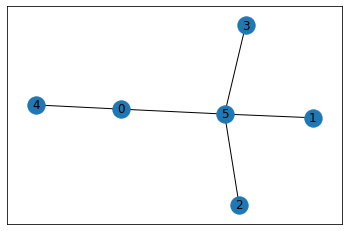

<Figure size 432x288 with 0 Axes>

In [ ]:
# First networkx library is imported
# along with matplotlib
import networkx as nx
import matplotlib.pyplot as plt


# Defining a Class
class GraphVisualization:

    def __init__(self):

        # visual is a list which stores all
        # the set of edges that constitutes a
        # graph
        self.visual = []

    # addEdge function inputs the vertices of an
    # edge and appends it to the visual list
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)

    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show(block=True)

# Driver code
G = GraphVisualization()
G.addEdge(2, 5)
G.addEdge(3, 5)
G.addEdge(4, 0)
G.addEdge(5, 0)
G.addEdge(5, 1)

G.visualize()



plot = plt.figure()

plt.show()


UPGMA ve NJ TREE ÇİZDİRİLMESİ

In [ ]:
# Create a DistanceTreeConstructor object
constructor = DistanceTreeConstructor()
# Construct the phlyogenetic tree using UPGMA algorithm
UPGMATree = constructor.upgma(distMatrix)
# Construct the phlyogenetic tree using NJ algorithm
NJTree = constructor.nj(distMatrix)

In [ ]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)

# Build the tree
seq_tree = constructor.build_tree(alignment)
seq_tree.rooted = True
print(seq_tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner4')
        Clade(branch_length=0.025000000000000022, name='Inner3')
            Clade(branch_length=0.05000000000000002, name='Inner2')
                Clade(branch_length=0.09166666666666665, name='Inner1')
                    Clade(branch_length=0.26249999999999996, name='seq5')
                    Clade(branch_length=0.03750000000000009, name='seq1')
                Clade(branch_length=0.20833333333333334, name='seq2')
            Clade(branch_length=0.07500000000000001, name='seq3')
        Clade(branch_length=0.175, name='seq4')
        Clade(branch_length=0.024999999999999967, name='seq6')


                               __________________________________________ seq4
      ________________________|
     |                        |                          ________________ seq6
  ___|                        |_________________________|
 |   |                                                  |________________ seq3
 |   |
_|   |___________________________________________________________________ seq2
 |
 |                     __________________________________________________ seq5
 |____________________|
                      |__________________________________________________ seq1



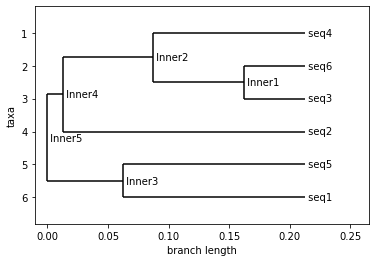

                             ____________________________________________ seq5
              ______________|
      _______|              |______ seq1
     |       |
  ___|       |__________________________________ seq2
 |   |
 |   |___________ seq3
_|
 |____________________________ seq4
 |
 |___ seq6



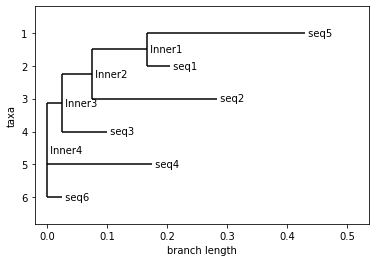

In [ ]:
# Draw the phlyogenetic tree
Phylo.draw_ascii(UPGMATree)
Phylo.draw(UPGMATree)
# Draw the phlyogenetic tree using terminal
Phylo.draw_ascii(NJTree)
Phylo.draw(NJTree)

PAIRWISE ile HAMMING DISTANCE BULMA

In [ ]:
seq1 = "ACCTGCACCA"
seq2 = "AGCTCCACTA"
seq3 = "GCCTACACTA"
seq4 = "TCCTACATCA"
seq5 = "CCCTGAACCT"
seq6 = "TCCTACACTA"


# İkişerli hamming distance bulunması için döngüye alma
def h_d_loop(seq1, seq2):
    h_distance = 0
    for position in range(len(seq1)):
        if seq1[position] != seq2[position]:
            h_distance += 1
    return h_distance


# Çıktıların yazdırılması
print("Hamming Distance: \n", end='')
print( h_d_loop(seq1, seq2), h_d_loop(seq1, seq3), h_d_loop(seq1, seq4), h_d_loop(seq1, seq5), h_d_loop(seq1, seq6))
print(h_d_loop(seq2, seq3), h_d_loop(seq2, seq4), h_d_loop(seq2, seq5), h_d_loop(seq2, seq6))
print(h_d_loop(seq3, seq4), h_d_loop(seq3, seq5), h_d_loop(seq3, seq6))
print(h_d_loop(seq4, seq5), h_d_loop(seq4, seq6))
print(h_d_loop(seq5,seq6))


Hamming Distance: 
3 3 3 3 3
3 5 6 3
3 5 1
5 2
5


BULUNAN DISTANCE ile DISTANCE MATRIX OLUŞTURMA ve COMPLETE GRAPH ÇİZDİRME

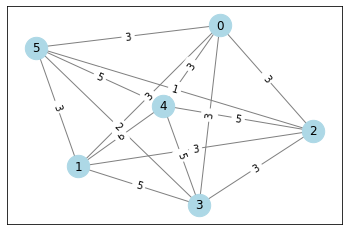

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Mesafe matrisini bir sözlüğe aktarma
def matrix_to_dict(matrix):
    d = {}
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if i != j:
                d[(i, j)] = matrix[i][j]
    return d

# Ağaç çizdirilmesi
def draw_tree(matrix):
    # Mesafe matrisinden bir grafik oluşturma
    d = matrix_to_dict(matrix)
    G = nx.Graph()
    for k, v in d.items():
        G.add_edge(k[0], k[1], weight=v)

    # Grafik oluşturma için layout sisteminin kullanılması
    pos = nx.spring_layout(G)

    # Kenarların çizilmesi
    nx.draw_networkx_edges(G, pos, edge_color='gray', width=1)

    # Nod'ların çizilmesi
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

    # Kenarları ağırlıklarla etiketleme
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    # Nodları etiketleme
    labels = {i: i for i in range(len(matrix))}
    nx.draw_networkx_labels(G, pos, labels)

    # Şekil gösterimi
    plt.show()

# Oluşturduğum fonksiyonun distance matrix ile denenmesi
distance_matrix = [[0, 3, 3, 3, 3, 3],
                  [3, 0, 3, 5, 6, 3],
                  [3, 3, 0, 3, 5, 1],
                  [3, 5, 3, 0, 5, 2],
                  [3, 6, 5, 5, 0, 5],
                  [3, 3, 1, 2, 5, 0]]
draw_tree(distance_matrix)

COMPLETE GRAPH'tan KRUSKAL ALGORİTMASI ile MST BULMA

BULUNAN MST ile PHYLOGENETIC TREE ÇİZDİRİLMESİ

MST'nin içerdiği kenarlar: 
 [[2, 5, 1], [3, 5, 2], [0, 1, 3], [0, 2, 3], [0, 4, 3]]


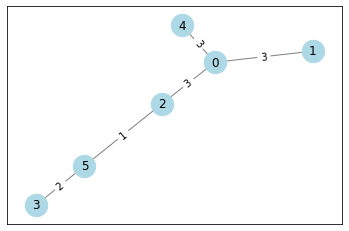

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Mesafe matrisini bir sözlüğe aktarma
def matrix_to_dict(matrix):
    d = {}
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if i != j:
                d[(i, j)] = matrix[i][j]
    return d

def find(parent, i):
    if parent[i] == i:
        return i
    return find(parent, parent[i])

# Döngü bulunması
def union(parent, rank, x, y):
    xroot = find(parent, x)
    yroot = find(parent, y)

    if rank[xroot] < rank[yroot]:
        parent[xroot] = yroot
    elif rank[xroot] > rank[yroot]:
        parent[yroot] = xroot
    else:
        parent[yroot] = xroot
        rank[xroot] += 1

# Minimum spanning tree bulunması
def kruskal(graph, V, E):
    result = []
    i = 0
    e = 0

    graph = sorted(graph, key=lambda item: item[2])

    parent = []
    rank = []

    for node in range(V):
        parent.append(node)
        rank.append(0)

    while e < V - 1:
        u, v, w = graph[i]
        i = i + 1
        x = find(parent, u)
        y = find(parent, v)

        if x != y:
            e = e + 1
            result.append([u, v, w])
            union(parent, rank, x, y)
    return result



# Ağaç çizimi
def draw_tree(matrix):
    # Kruskal algoritması kullanılarak minimum spanning tree bulunması
    graph = [[i, j, matrix[i][j]] for i in range(len(matrix)) for j in range(len(matrix[i])) if i != j]
    mst = kruskal(graph, len(matrix), len(graph))
    print("MST'nin içerdiği kenarlar: \n", mst)

    # Minimum spanning tree oluşturulması
    G = nx.Graph()
    for edge in mst:
        G.add_edge(edge[0], edge[1], weight=edge[2])

    # Grafik için layout sisteminin kullanılması
    pos = nx.spring_layout(G)

    # Kenarları çiz
    nx.draw_networkx_edges(G, pos, edge_color='gray', width=1)

    # Nodları çiz
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

    # Kenarları ağırlıklarla etiketleme
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    # Nodları etiketleme
    labels = {i: i for i in range(len(matrix))}
    nx.draw_networkx_labels(G, pos, labels)

    # Görselleştirme
    plt.show()

# oluşturduğum fonksiyonun distance matrix ile test edilmesi
distance_matrix = [[0, 3, 3, 3, 3, 3],
                  [3, 0, 3, 5, 6, 3],
                  [3, 3, 0, 3, 5, 1],
                  [3, 5, 3, 0, 5, 2],
                  [3, 6, 5, 5, 0, 5],
                  [3, 3, 1, 2, 5, 0]]
draw_tree(distance_matrix)



BULUNAN DISTANCE MATRIX ile UPGMA TREE ÇİZDİRİLMESİ

<ipython-input-2-71316b5567b1>:13: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(distance_matrix, 'average')


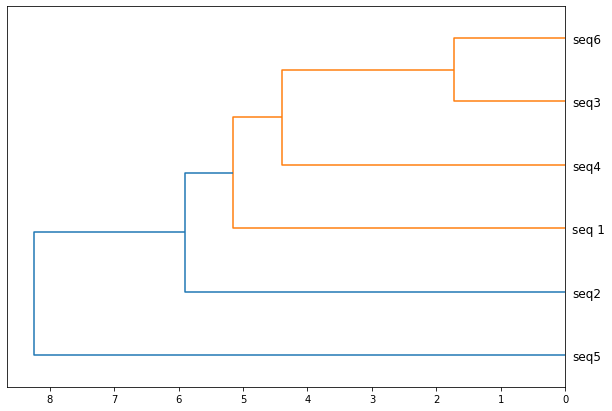

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Mesafe matrisini listeye dönüştür
distance_matrix = [[0, 3, 3, 3, 3, 3],
                  [3, 0, 3, 5, 6, 3],
                  [3, 3, 0, 3, 5, 1],
                  [3, 5, 3, 0, 5, 2],
                  [3, 6, 5, 5, 0, 5],
                  [3, 3, 1, 2, 5, 0]]

# Dendrogramı hesaplamak için ortalama bağlantı yöntemini kullan
linked = linkage(distance_matrix, 'average')

# Dendrogramın gösterilmesi
plt.figure(figsize=(10, 7))
dendrogram(linked,
           labels=['seq 1', 'seq2', 'seq3', 'seq4', 'seq5', 'seq6'],
           show_leaf_counts=True, orientation='left')
plt.show()

BULUNAN DISTANCE MATRIX ile ALIGN YÖNTEMİYLE UPGMA VE NJ TREE ÇİZDİRİLMESİ

Tree(rooted=True)
    Clade(branch_length=0, name='Inner4')
        Clade(branch_length=0.025000000000000022, name='Inner3')
            Clade(branch_length=0.05000000000000002, name='Inner2')
                Clade(branch_length=0.09166666666666665, name='Inner1')
                    Clade(branch_length=0.26249999999999996, name='seq5')
                    Clade(branch_length=0.03750000000000009, name='seq1')
                Clade(branch_length=0.20833333333333334, name='seq2')
            Clade(branch_length=0.07500000000000001, name='seq3')
        Clade(branch_length=0.175, name='seq4')
        Clade(branch_length=0.024999999999999967, name='seq6')
                               __________________________________________ seq4
      ________________________|
     |                        |                          ________________ seq6
  ___|                        |_________________________|
 |   |                                                  |________________ seq3
 |   |
_|   |

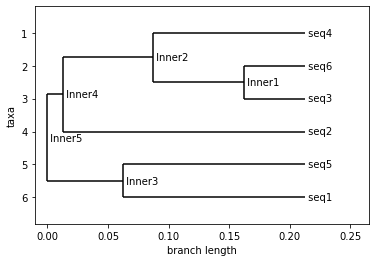

                             ____________________________________________ seq5
              ______________|
      _______|              |______ seq1
     |       |
  ___|       |__________________________________ seq2
 |   |
 |   |___________ seq3
_|
 |____________________________ seq4
 |
 |___ seq6



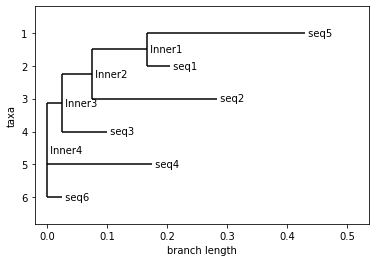

In [ ]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
alignment = MultipleSeqAlignment(
     [
        SeqRecord(Seq("ACCTGCACCA"), id='seq1'),
        SeqRecord(Seq("AGCTCCACTA"), id='seq2'),
        SeqRecord(Seq("GCCTACACTA"), id='seq3'),
        SeqRecord(Seq("TCCTACATCA"), id='seq4'),
        SeqRecord(Seq("CCCTGAACCT"), id='seq5'),
        SeqRecord(Seq("TCCTACACTA"), id='seq6'),
    ]
 )

# Importing necessary libraries from BioPython
from Bio import Phylo, AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

distMatrix = [[0, 3, 3, 3, 3, 3],
                  [3, 0, 3, 5, 6, 3],
                  [3, 3, 0, 3, 5, 1],
                  [3, 5, 3, 0, 5, 2],
                  [3, 6, 5, 5, 0, 5],
                  [3, 3, 1, 2, 5, 0]]


# Create a DistanceTreeConstructor object
constructor = DistanceTreeConstructor()
constructor = DistanceTreeConstructor(calculator)

# Build the tree
seq_tree = constructor.build_tree(alignment)
seq_tree.rooted = True
print(seq_tree)


# Draw the phlyogenetic tree
Phylo.draw_ascii(UPGMATree)
Phylo.draw(UPGMATree)
# Draw the phlyogenetic tree using terminal
Phylo.draw_ascii(NJTree)
Phylo.draw(NJTree)